In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Business Understanding

A primeira etapa da metodologia consiste em identificar as reais necessidades do projeto. 
Antes de respondermos algumas perguntas vamos entender um pouco melhor sobre a empresa em questão

<b>Wallmart</b>
<br/>
<br/>
Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. 
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.Sendo uma das principais lojas de varejo do mundo!

### <p style="color: #2281e6"> <b>Perguntas para esclarecimento do negócio. </b></p>

<b>Qual a necessidade da empresa ? </b>
<br/>
A empresa possui uma necessidade de identificar o faturamento das lojas nos USA. São 45 lojas espalhadas pelo país.

<b>Qual o objetivo do projeto ? </b>
<br/>
Fazer um levantamento do faturamento das 45 lojas e apontar qual seria o melhor loja para expandir o tamanho.

<b>Quais as métricas de sucesso a serem alcançadas ? </b>
<br/>
Identificar a melhor loja para expandir de tamanho




## Data Understanding

A segunda etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória. São 4 tasks principais para essa etapa do processo. Coleta inicial dos dados, descrição dos dados, exploração dos dados e qualidade dos dados

### <p style="color: #2281e6"> <b> 1° etapa - Coleta inicial dos dados</b></p>

<b>Os dados estão disponíveis ?</b>
<br/>
Sim. Temos um CSV com todas as informações necessárias para a resolução do problema


### <p style="color: #2281e6"> <b> 2° etapa - Descrição dos dados</b></p>

<b>Qual a estrutura desses dados ?</b>


<img src="explicação-dataset.png" width=70%>

In [ ]:
df = pd.read_csv('Walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### <p style="color: #2281e6"> <b> 3° etapa - Exploração dos dados</b></p>

Entendendo melhor os dados disponíveis.

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<AxesSubplot:>

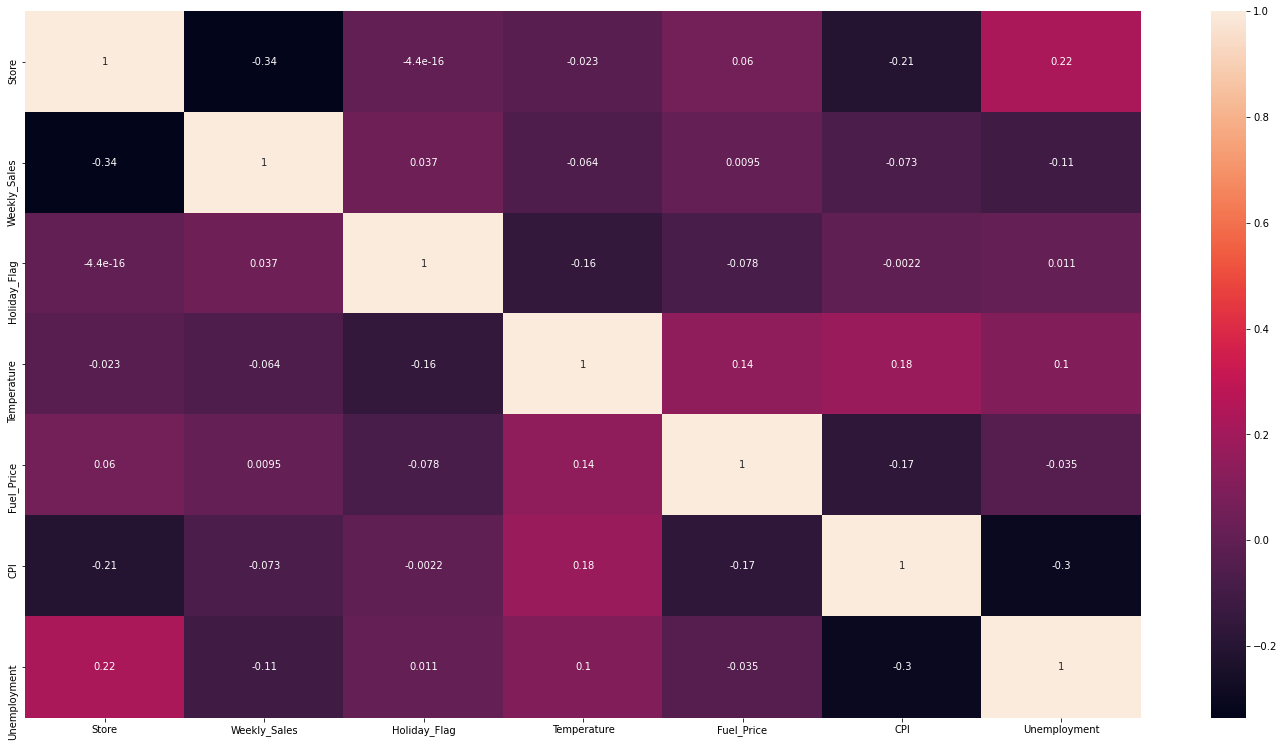

In [ ]:
plt.figure(figsize = (25,13))
sns.heatmap(df.corr(),  annot=True)

In [ ]:
# Verficando se a quantidade de lojas bate
df['Store'].sort_values(ascending = True).value_counts()

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

In [ ]:
# Verificando quantos registros existem na semana de algum feriado
df[(df['Store'] == 1) & (df['Holiday_Flag'] == 1)].count()

Store           10
Date            10
Weekly_Sales    10
Holiday_Flag    10
Temperature     10
Fuel_Price      10
CPI             10
Unemployment    10
dtype: int64

In [ ]:
# Vendo como as vendas se comportam entre as lojas
sales_stores = df.groupby('Store').Weekly_Sales.agg([min, max, 'mean', 'median'])

#Modificando as unidades para milhões
sales_stores = np.round(sales_stores / 1000000, 2)
sales_stores

,min,max,mean,median
Store,,,,
1,1.32,2.39,1.56,1.53
2,1.65,3.44,1.93,1.88
3,0.34,0.61,0.40,0.40
4,1.76,3.68,2.09,2.07
5,0.26,0.51,0.32,0.31
6,1.26,2.73,1.56,1.52
7,0.37,1.06,0.57,0.56
8,0.77,1.51,0.91,0.89
9,0.45,0.91,0.54,0.54


### <p style="color: #2281e6"> <b> 4° etapa - Qualidade dos dados</b></p>

In [ ]:
#Verificando se possui valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#Verificando valores estatistico para tentar encontrar algum valor discrepante
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Data Preparation

Nesta etapa, devemos tratar os dados para nos certificarmos que as informações estão de acordo com o esperado. Consistência de erros e ausência de valores deverão ser resolvidos <br/>
Aqui existem 4 etapas de preparação: Seleção dos dados, Limpeza dos dados, Construção de dados e Integrando dados.

### <p style="color: #2281e6"> <b> 1° etapa - Seleção dos dados</b></p>

Foi definido que para chegar ao nosso objeto, as colunas "Temperature" e "CPI" não seriam necessárias, então foram removidas do dataset

In [ ]:
clean_df = df.drop(columns=['Temperature', 'CPI'])
clean_df

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,Unemployment
0,1,05-02-2010,1643690.90,0,2.572,8.106
1,1,12-02-2010,1641957.44,1,2.548,8.106
2,1,19-02-2010,1611968.17,0,2.514,8.106
3,1,26-02-2010,1409727.59,0,2.561,8.106
4,1,05-03-2010,1554806.68,0,2.625,8.106
...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,3.997,8.684
6431,45,05-10-2012,733455.07,0,3.985,8.667
6432,45,12-10-2012,734464.36,0,4.000,8.667
6433,45,19-10-2012,718125.53,0,3.969,8.667


### <p style="color: #2281e6"> <b> 2° etapa - Limpeza dos dados</b></p>

Nossos dados estão de uma maneira geral, com coerência. Não possuem valores nulos, e nem dados inconsistentes

### <p style="color: #2281e6"> <b> 3° etapa - Construção de dados</b></p>

### <p style="color: #2281e6"> <b> 4° etapa - Integrando dados</b></p>

Não haverá integração de dados